In [54]:
pip install scikit-learn -U

     |████████████████████████████████| 7.2 MB 2.1 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
Note: you may need to restart the kernel to use updated packages.


In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_csv('bcw_new.csv')
df.columns
df = df.replace('?', np.NaN)
df.head(10)

,Unnamed: 0,Sample.code.number,Clump.Thickness,Uniformity.of.Cell.Size,Uniformity.of.Cell.Shape,Marginal.Adhesion,Single.Epithelial.Cell.Size,Bare.Nuclei,Bland.Chromatin,Normal.Nucleoli,Mitoses,Class
0,276,432809,3,1,3,1,2,NaN,2,1,1,2
1,293,563649,8,8,8,1,2,NaN,6,10,1,4
2,295,606140,1,1,1,1,2,NaN,2,1,1,2
3,298,61634,5,4,3,1,2,NaN,2,3,1,2
4,316,704168,4,6,5,6,7,NaN,4,9,1,2
5,322,733639,3,1,1,1,2,NaN,3,1,1,2
6,412,1238464,1,1,1,1,1,NaN,2,1,1,2
7,618,1057067,1,1,1,1,1,NaN,1,1,1,2
8,2,1002945,5,4,4,5,7,10.0,3,2,1,2
9,6,1017122,8,10,10,8,7,10.0,9,7,1,4


In [72]:
df = df.dropna()

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

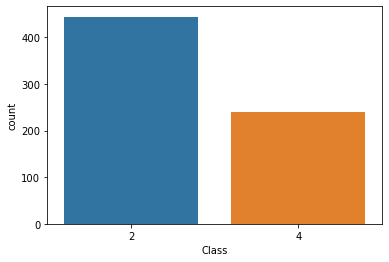

In [73]:
# y includes diagnosis column with M or B values
y = df.Class

# drop the column 'id' as it is does not convey useful info
# drop diagnosis since we are separating labels and features

list = ['Unnamed: 0', 'Sample.code.number', 'Class']

# X includes our features
X = df.drop(list,axis=1)
# 누락된 모든 값(na, NAN, NaN) 열삭제
df = df.dropna(axis=1)


# M 및 B 셀의 갯수를 가져옵니다.
df['Class'].value_counts()

# Visualize this count
sns.countplot(df['Class'], label = "Count")

<AxesSubplot:>

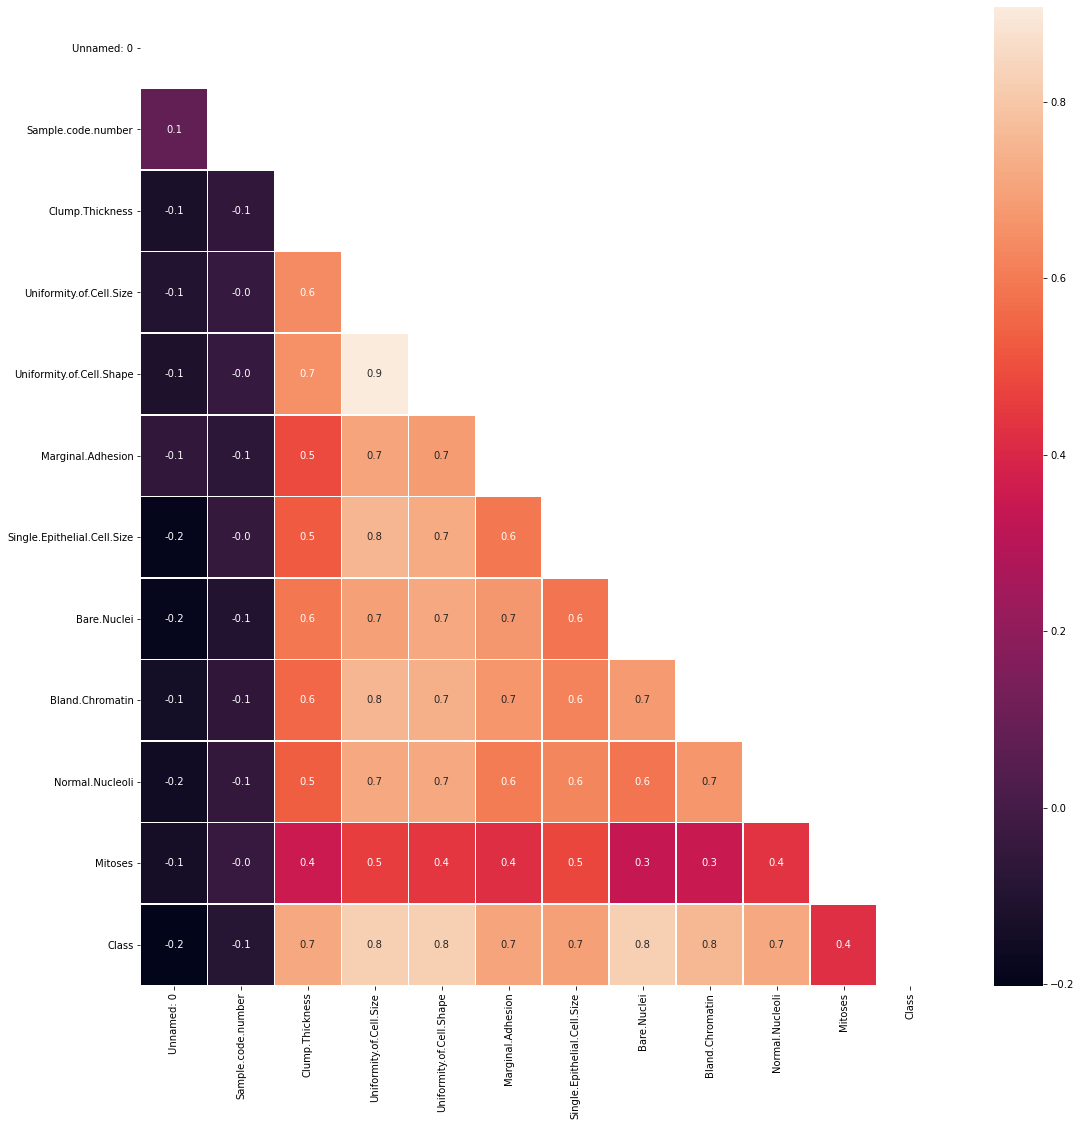

In [74]:
#correlation map
f, ax = plt.subplots(figsize = (18, 18))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True, linewidths =.5, fmt = '.1f', ax = ax, mask=matrix)

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,stratify=y,random_state=17)

In [76]:
#Feature Scaling
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [77]:
# Define a function which trains models
def models(X_train, y_train):
    
    #Using Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, y_train)
    
    #Using SVC linear
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(X_train, y_train)
    
    #Using SVC rbf
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(X_train, y_train)
    
    #Using DecisionTreeClassifier
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, y_train)
    
    #Using RandomForestClassifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, y_train)
    
    #model accuracy on the training data.
    print(log.score(X_train, y_train))
    print(svc_lin.score(X_train, y_train))
    print(svc_rbf.score(X_train, y_train))
    print(tree.score(X_train, y_train))
    print(forest.score(X_train, y_train))
    
    return log, svc_lin, svc_rbf, tree, forest

#get the training results
model = models(X_train, y_train)

0.9748953974895398
0.9686192468619247
0.9728033472803347
1.0
0.99581589958159


In [78]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
    print('Model', i)
    #Check precision, recall, f1-socre
    print(classification_report(y_test, model[i].predict(X_test)))
    #Another way to get the models accuracy on the test data
    print(accuracy_score(y_test, model[i].predict(X_test)))
    print()

Model 0
              precision    recall  f1-score   support

           2       0.96      0.97      0.96       133
           4       0.94      0.92      0.93        72

    accuracy                           0.95       205
   macro avg       0.95      0.94      0.95       205
weighted avg       0.95      0.95      0.95       205

0.9512195121951219

Model 1
              precision    recall  f1-score   support

           2       0.96      0.98      0.97       133
           4       0.97      0.92      0.94        72

    accuracy                           0.96       205
   macro avg       0.96      0.95      0.96       205
weighted avg       0.96      0.96      0.96       205

0.9609756097560975

Model 2
              precision    recall  f1-score   support

           2       0.98      0.96      0.97       133
           4       0.93      0.97      0.95        72

    accuracy                           0.97       205
   macro avg       0.96      0.97      0.96       205
weighted a

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve

In [80]:
#Classifier 1 - Using Logistic Regression
log = LogisticRegression(random_state = 0)
log.fit(X_train, y_train)
log_prediction_proba = log.predict_proba(X_train)   
log_prediction_proba

array([[9.96517245e-01, 3.48275458e-03],
       [3.49111936e-03, 9.96508881e-01],
       [9.97913126e-01, 2.08687361e-03],
       [9.58692848e-01, 4.13071517e-02],
       [9.92717888e-01, 7.28211216e-03],
       [9.88235355e-01, 1.17646447e-02],
       [9.94962195e-01, 5.03780513e-03],
       [9.96756543e-01, 3.24345736e-03],
       [5.48277290e-02, 9.45172271e-01],
       [9.33026692e-01, 6.69733082e-02],
       [9.95334451e-01, 4.66554901e-03],
       [9.97913126e-01, 2.08687361e-03],
       [9.84707691e-01, 1.52923090e-02],
       [9.96517245e-01, 3.48275458e-03],
       [2.89267398e-02, 9.71073260e-01],
       [9.95529472e-01, 4.47052776e-03],
       [9.98067754e-01, 1.93224579e-03],
       [9.96517245e-01, 3.48275458e-03],
       [1.00411679e-01, 8.99588321e-01],
       [1.77302845e-02, 9.82269716e-01],
       [8.62227667e-07, 9.99999138e-01],
       [9.91210460e-01, 8.78953980e-03],
       [2.62524260e-02, 9.73747574e-01],
       [9.98558614e-01, 1.44138581e-03],
       [9.921829

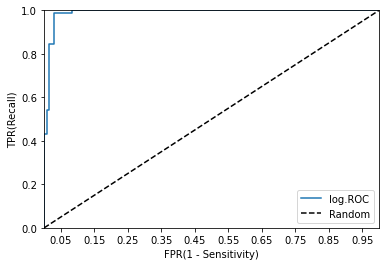

In [81]:
from sklearn.metrics import roc_curve

pred_proba_class1 = log.predict_proba(X_test)[:,1]
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba1 = log.predict_proba(X_test)

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1, pos_label=4)
thr_index = np.arange(1, thresholds.shape[0], 5)

def roc_curve_plot1(y_test, pred_proba_class1) :
    #임계값에 따른 FPR, TPR 값을 반환 받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1, pos_label=4)
    # ROC 그래프
    plt.plot(fprs, tprs, label='log.ROC')
    # 가운데 대각선
    plt.plot([0,1], [0,1], 'k--', label = 'Random')
    # FPR X 축의 Scale을 0.1 단위로 변경, x, y 축 명 설정등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1), 2))
    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel('FPR(1 - Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()

roc_curve_plot1(y_test, pred_proba1[:,1])

In [82]:
#Classifier 2 - Using SVC linear
from sklearn.svm import SVC
svc_lin = SVC(kernel = 'linear', random_state = 0, probability=True)
svc_lin.fit(X_train, y_train)
svc_lin_prediction_proba = svc_lin.predict_proba(X_train)
svc_lin_prediction_proba

array([[9.96023776e-01, 3.97622382e-03],
       [3.69454627e-03, 9.96305454e-01],
       [9.98287350e-01, 1.71265046e-03],
       [9.42798317e-01, 5.72016827e-02],
       [9.92964150e-01, 7.03584984e-03],
       [9.83006797e-01, 1.69932026e-02],
       [9.94710634e-01, 5.28936567e-03],
       [9.96990116e-01, 3.00988446e-03],
       [6.99456922e-02, 9.30054308e-01],
       [9.03954875e-01, 9.60451248e-02],
       [9.94520425e-01, 5.47957471e-03],
       [9.98287350e-01, 1.71265046e-03],
       [9.78513439e-01, 2.14865608e-02],
       [9.96023776e-01, 3.97622382e-03],
       [1.39348782e-02, 9.86065122e-01],
       [9.96138311e-01, 3.86168852e-03],
       [9.98225746e-01, 1.77425445e-03],
       [9.96023776e-01, 3.97622382e-03],
       [1.57779244e-01, 8.42220756e-01],
       [1.63183998e-02, 9.83681600e-01],
       [3.49897854e-11, 1.00000000e+00],
       [9.89332720e-01, 1.06672800e-02],
       [3.46643522e-02, 9.65335648e-01],
       [9.98712602e-01, 1.28739760e-03],
       [9.907066

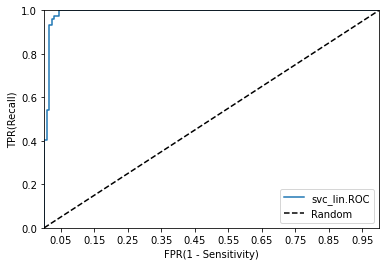

In [83]:
pred_proba_class2 = svc_lin.predict_proba(X_test)[:,1]
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba2 = svc_lin.predict_proba(X_test)

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class2, pos_label=4)
thr_index = np.arange(1, thresholds.shape[0], 5)

def roc_curve_plot2(y_test, pred_proba_class2) :
    #임계값에 따른 FPR, TPR 값을 반환 받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class2, pos_label=4)
    # ROC 그래프
    plt.plot(fprs, tprs, label='svc_lin.ROC')
    # 가운데 대각선
    plt.plot([0,1], [0,1], 'k--', label = 'Random')
    # FPR X 축의 Scale을 0.1 단위로 변경, x, y 축 명 설정등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1), 2))
    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel('FPR(1 - Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()

roc_curve_plot2(y_test, pred_proba2[:,1])

In [84]:
#Classifier 3 - Using SVC rbf
from sklearn.svm import SVC
svc_rbf = SVC(kernel = 'rbf', random_state = 0, probability=True)
svc_rbf.fit(X_train, y_train)
svc_rbf_prediction_proba = svc_rbf.predict_proba(X_train)
svc_rbf_prediction_proba

array([[9.96406278e-01, 3.59372247e-03],
       [4.47597999e-03, 9.95524020e-01],
       [9.97552418e-01, 2.44758169e-03],
       [9.59555994e-01, 4.04440055e-02],
       [9.96306083e-01, 3.69391658e-03],
       [9.93048315e-01, 6.95168533e-03],
       [9.96661711e-01, 3.33828882e-03],
       [9.97308227e-01, 2.69177286e-03],
       [3.98159031e-02, 9.60184097e-01],
       [9.71799381e-01, 2.82006193e-02],
       [9.94900362e-01, 5.09963766e-03],
       [9.97552418e-01, 2.44758169e-03],
       [9.89339309e-01, 1.06606914e-02],
       [9.96406278e-01, 3.59372247e-03],
       [9.26362367e-03, 9.90736376e-01],
       [9.98264819e-01, 1.73518120e-03],
       [9.96120498e-01, 3.87950216e-03],
       [9.96406278e-01, 3.59372247e-03],
       [1.67796132e-02, 9.83220387e-01],
       [9.24764400e-03, 9.90752356e-01],
       [3.18892089e-02, 9.68110791e-01],
       [9.94585357e-01, 5.41464252e-03],
       [2.10440181e-02, 9.78955982e-01],
       [9.97305953e-01, 2.69404720e-03],
       [9.953555

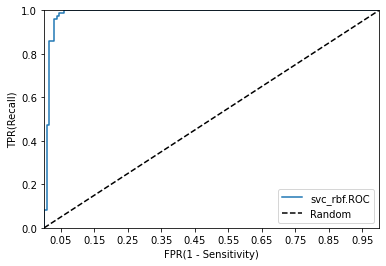

In [85]:
pred_proba_class3 = svc_rbf.predict_proba(X_test)[:,1]
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba3 = svc_rbf.predict_proba(X_test)

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class3, pos_label=4)
thr_index = np.arange(1, thresholds.shape[0], 5)

def roc_curve_plot3(y_test, pred_proba_class3) :
    #임계값에 따른 FPR, TPR 값을 반환 받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class3, pos_label=4)
    # ROC 그래프
    plt.plot(fprs, tprs, label='svc_rbf.ROC')
    # 가운데 대각선
    plt.plot([0,1], [0,1], 'k--', label = 'Random')
    # FPR X 축의 Scale을 0.1 단위로 변경, x, y 축 명 설정등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1), 2))
    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel('FPR(1 - Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()

roc_curve_plot3(y_test, pred_proba3[:,1])

In [86]:
#Classifier 4 - Using Classification Tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(X_train, y_train)
tree.fit_prediction_proba = tree.predict_proba(X_train)
tree.fit_prediction_proba

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.

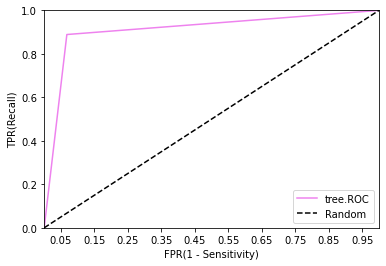

In [87]:
pred_proba_class4 = tree.predict_proba(X_test)[:,1]
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba4 = tree.predict_proba(X_test)

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class4, pos_label=4)
thr_index = np.arange(1, thresholds.shape[0], 5)

def roc_curve_plot4(y_test, pred_proba_class4) :
    #임계값에 따른 FPR, TPR 값을 반환 받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class4, pos_label=4)
    # ROC 그래프
    plt.plot(fprs, tprs, label='tree.ROC', color='violet')
    # 가운데 대각선
    plt.plot([0,1], [0,1], 'k--', label = 'Random')
    # FPR X 축의 Scale을 0.1 단위로 변경, x, y 축 명 설정등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1), 2))
    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel('FPR(1 - Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()

roc_curve_plot4(y_test, pred_proba4[:,1])

In [88]:
#Classifier 5 - Using Random Forest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, y_train)
forest_prediction_proba = forest.predict_proba(X_train)
forest_prediction_proba

array([[1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.1, 0.9],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. ,

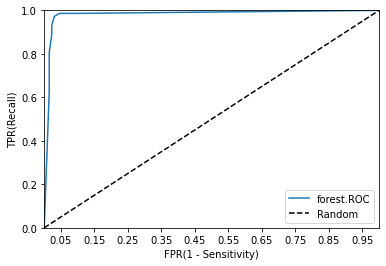

In [89]:
pred_proba_class5 = forest.predict_proba(X_test)[:,1]
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba5 = forest.predict_proba(X_test)

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class5, pos_label=4)
thr_index = np.arange(1, thresholds.shape[0], 5)

def roc_curve_plot5(y_test, pred_proba_class5) :
    #임계값에 따른 FPR, TPR 값을 반환 받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class5, pos_label=4)
    # ROC 그래프
    plt.plot(fprs, tprs, label='forest.ROC')
    # 가운데 대각선
    plt.plot([0,1], [0,1], 'k--', label = 'Random')
    # FPR X 축의 Scale을 0.1 단위로 변경, x, y 축 명 설정등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1), 2))
    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel('FPR(1 - Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()

roc_curve_plot5(y_test, pred_proba5[:,1])

In [90]:
#Stacking Classifier with Scikit-learn(Meta_Classifier)
from sklearn.ensemble import StackingClassifier

In [91]:
estimators = [('Logistic',log),
              ('SVC linear', svc_lin),
              ('SVC rbf', svc_rbf),
              ('Classification Tree',tree),
              ('Random Forest',forest)]

stack_clf_fit =StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack_clf_fit.fit(X_train,y_train)
stack_predictions = stack_clf_fit.predict(X_train)
stack_predictions

array([2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 4, 2,
       4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 4, 2, 2,
       4, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2,
       2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 4, 2,
       2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 4, 4, 2, 4, 2,
       2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2, 4, 4, 2, 2, 4, 2, 4, 2,
       2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 4,
       4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 2, 4, 4, 4, 2, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4,
       4, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2,
       2, 4, 4, 2, 4, 2, 2, 4, 4, 4, 2, 2, 2, 2, 4,

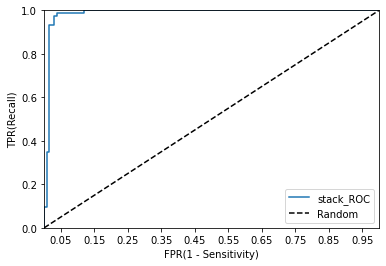

In [92]:
pred_proba_class6 = stack_clf_fit.predict_proba(X_test)[:,1]
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba6 = stack_clf_fit.predict_proba(X_test)

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class5, pos_label=4)
thr_index = np.arange(1, thresholds.shape[0], 5)

def roc_curve_plot6(y_test, pred_proba_class6) :
    #임계값에 따른 FPR, TPR 값을 반환 받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class6, pos_label=4)
    # ROC 그래프
    plt.plot(fprs, tprs, label='stack_ROC')
    # 가운데 대각선
    plt.plot([0,1], [0,1], 'k--', label = 'Random')
    # FPR X 축의 Scale을 0.1 단위로 변경, x, y 축 명 설정등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1), 2))
    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel('FPR(1 - Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()

roc_curve_plot6(y_test, pred_proba6[:,1])

In [93]:
confusion_matrix(y_train,stack_predictions)

array([[307,   4],
       [  5, 162]])

In [94]:
#Voting classifier
voting_clf_fit = VotingClassifier(
estimators = [('Logistic',log),
              ('SVC linear', svc_lin),
              ('SVC rbf', svc_rbf),
              ('Classification Tree',tree),
              ('Random Forest',forest)])
voting_clf_fit.fit(X_train, y_train)

VotingClassifier(estimators=[('Logistic', LogisticRegression(random_state=0)),
                             ('SVC linear',
                              SVC(kernel='linear', probability=True,
                                  random_state=0)),
                             ('SVC rbf', SVC(probability=True, random_state=0)),
                             ('Classification Tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     random_state=0)),
                             ('Random Forest',
                              RandomForestClassifier(criterion='entropy',
                                                     n_estimators=10,
                                                     random_state=0))])

In [95]:
for clf in (log,svc_lin,svc_rbf,tree,forest,voting_clf_fit):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_train)
    print(clf.__class__.__name__,accuracy_score(y_train,y_pred))

LogisticRegression 0.9748953974895398
SVC 0.9686192468619247
SVC 0.9728033472803347
DecisionTreeClassifier 1.0
RandomForestClassifier 0.99581589958159
VotingClassifier 0.9769874476987448


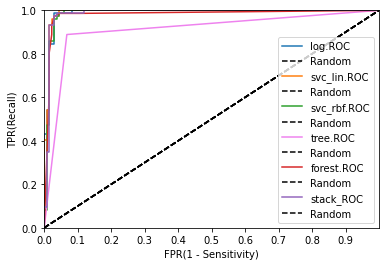

In [96]:
roc_curve_plot1(y_test, pred_proba1[:,1])
roc_curve_plot2(y_test, pred_proba2[:,1])
roc_curve_plot3(y_test, pred_proba3[:,1])
roc_curve_plot4(y_test, pred_proba4[:,1])
roc_curve_plot5(y_test, pred_proba5[:,1])
roc_curve_plot6(y_test, pred_proba6[:,1])

In [101]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, stack_predictions[1:206])
auc

0.474937343358396